<a href="https://colab.research.google.com/github/AndresCMontejo/TelecomX_proyecto_parte2/blob/main/Proyecto_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICCIÓN DE CANCELACIÓN**

### **Misión**

 Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

### **Objetivo del desafío**
1.- Preparar los datos para el modelado (tratamiento, codificación, normalización).

2.- Realizar análisis de correlación y selección de variables.

3.- Entrenar dos o más modelos de clasificación.

4.- Evaluar el rendimiento de los modelos con métricas.

5.- Interpretar los resultados, incluyendo la importancia de las variables.

6.- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

### **Practicas**

✅ Preprocesamiento de datos para Machine Learning

✅ Construcción y evaluación de modelos predictivos

✅ Interpretación de resultados y entrega de insights

✅ Comunicación técnica con enfoque estratégico

## **Importando libreria de Pandas**

In [1]:
import pandas as pd

## **Extracción del Archivo Tratado**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ETL/datos_tratados_TelecomX.csv')

In [5]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Eliminación de Columnas Irrelevantes**

Eliminando las columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

**Columnas a eliminar**
Analizando el dataframe, observamos que las columnas que conviene eliminar (ID/identificadores) son las customerID, phone, account, ya que estos son identificadores o datos de contacto que no aportan señal predictiva y pueden meter ruido a nuestro analisis.

In [6]:
drop_now = ["customerID", "phone", "account"]
df = df.drop(columns=drop_now, errors="ignore")

# Separando X y Y
target_col = "Churn"
y = df[target_col]
X = df.drop(columns=[target_col], errors="ignore")

# Guardando un nuevo dataFrame con una versión mas limpia
df.to_csv("datos_TelecomX_sin_IDs_constantes.csv", index=False)

## **Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [7]:
# Cargando nuestro nuevo DataFrame filtrado.
df = pd.read_csv("/content/drive/MyDrive/ETL/datos_TelecomX_sin_IDs_constantes.csv")

# Identificando las columnas categóricas (object o category)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas categóricas detectadas:", categorical_cols)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Forma del dataset original:", df.shape)
print("Forma del dataset codificado:", df_encoded.shape)

Columnas categóricas detectadas: ['Churn', 'customer', 'internet']
Forma del dataset original: (7267, 3)
Forma del dataset codificado: (7267, 1019)


## **Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Conteo de clases (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases (Churn):
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


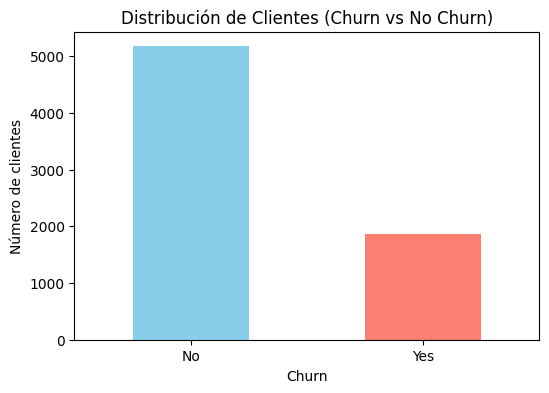

In [8]:
#Distribución de la variable objetivo (Churn)
churn_counts = df['Churn'].value_counts()
churn_proportion = df['Churn'].value_counts(normalize=True)

print("Conteo de clases (Churn):")
print(churn_counts)
print("\nProporción de clases (Churn):")
print(churn_proportion)

# Visualización rápida
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Clientes (Churn vs No Churn)")
plt.xticks(rotation=0)
plt.ylabel("Número de clientes")
plt.show()

## **Balanceo de Clases**

Profundizar en el análisis, aplicando técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.